In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import load_iris
import seaborn as sns

In [2]:
iris_data=load_iris()
df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
df['class'] = iris_data.target
# df=pd.DataFrame(data.data,columns=data['feature_names'])

## knn 모델링 주의할 점
- 스케일링
- 적절한 k 값: k값이 너문 작다면 가장 가까운 데이터만 보는 것이기 때문에 과적합이 발생할 수 있다. 
- 차원의 저주: 차원이 증가할수록 데이터 간의 거리가 비슷해지기 때문
- 데이터의 양: knn은 모든 데이터를 순회하며 거리를 계산하기 때문에 너무 많은 경우 속도가 느림
- 이상치 민감성: 거리기반이기 때문에 이상치가 존재할 시 라벨을 부여할 때 오류가 발생할 수 있다. 

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.info()
df.describe()
df.columns
df.shape
df.dtypes
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

In [5]:
# 데이터셋 분리
X=df.iloc[0:,:-1].values
y=df.iloc[:, 4].values

In [14]:
X=df.iloc[0:,:-1]
y=df.iloc[:, 4]

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=42)

In [19]:
y_train.shape

(120,)

#### 이상치 처리
- KNN은 이상치에 민감하기 때문에 이상치가 있는지 확인 

#### 주의해야 할 점 
- train, test를 분리했기 때문에 이상치 삭제 및 변환을 X_train에만 적용시켜야 한다.

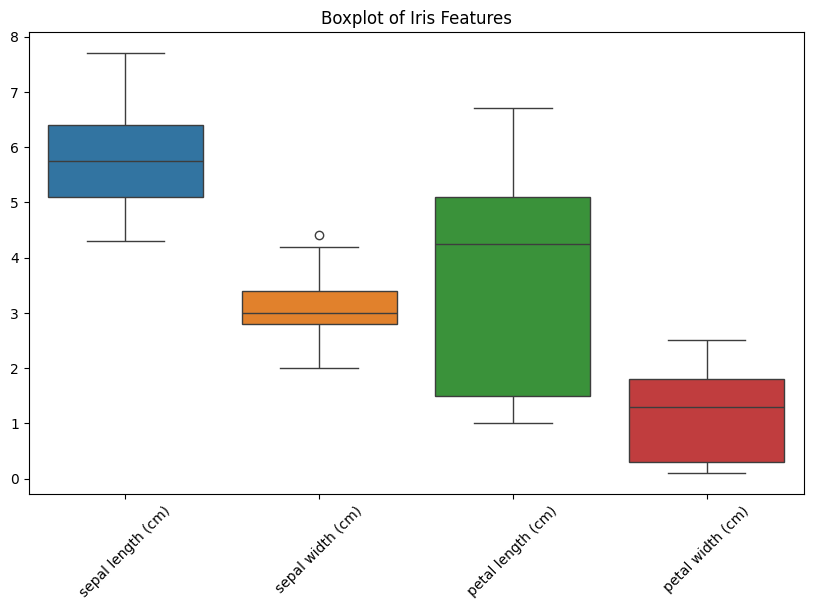

In [21]:
# 각 특성에 대한 Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train)
plt.title('Boxplot of Iris Features')
plt.xticks(rotation=45)
plt.xticks(ticks=range(len(df.columns[:4])), labels=df.columns[:4], rotation=45)

plt.show()

- sepal width 쪽에 이상치를 발견함
- sepal width 분포 그려보겠다.

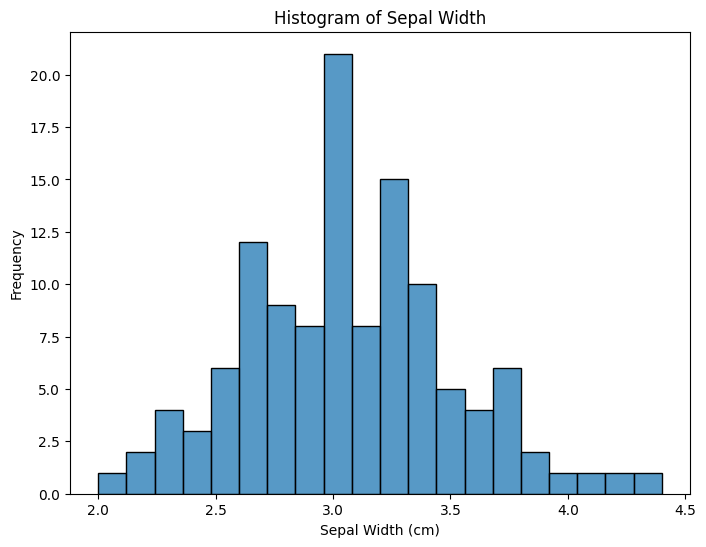

In [24]:
# Sepal Width에 대한 히스토그램
plt.figure(figsize=(8, 6))
sns.histplot(X_train['sepal width (cm)'], bins=20, kde=False)  # kde=False는 커널 밀도 추정을 끔
plt.title('Histogram of Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.show()

- qqplot이란?
- 데이터의 정규성을 검정할 때 사용하는 그래프로 하나는 실제 분포이며 다른 하나는 정규분포이다.
- x축에 표준정규분포의 분위수 (z-score)가 표현되며, y축에는 실제 데이터의 값이 표현된다. 
- 즉 데이터가 대각선에 일치하게 분포하느냐에 따라 정규성 여부를 판단할 수 있다.  

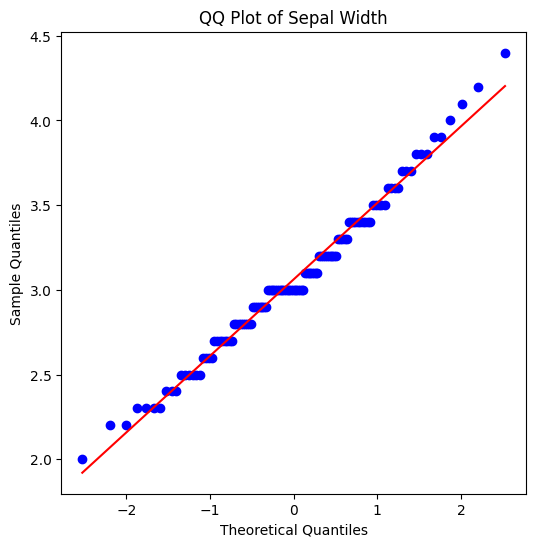

In [23]:
import scipy.stats as stats
plt.figure(figsize=(6, 6))
stats.probplot(X_train['sepal width (cm)'], dist="norm", plot=plt)
plt.title('QQ Plot of Sepal Width')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

- 오른쪽 끝에 이상치가 있는 것으로 보임 
- 대각선을 따르지 않고 위로 상승하는 것으로 보아 이상치라고 판단할 수 있다.


In [25]:
X_train[['sepal width (cm)']].sort_values(by='sepal width (cm)', ascending=False)
# 4.4가 가장 크다. 

,sepal width (cm)
15,4.4
33,4.2
32,4.1
14,4.0
5,3.9
...,...
41,2.3
93,2.3
62,2.2
119,2.2


In [12]:
# 1. Sepal Width 에서 가장 큰 값 탐지
max_value = X_train[:, 1].max()
# 2. 가장 큰 Sepal Width 값을 가진 행의 인덱스
max_index = (X_train[:, 1] == max_value).nonzero()[0]

# 3. 해당 인덱스 행 삭제 (X_train과 y_train에서 삭제)
X_train = np.delete(X_train, max_index, axis=0)
y_train = np.delete(y_train, max_index, axis=0)

In [13]:
# 1개 삭제됨 
print(f"Sepal Width가 가장 큰 행 삭제 후 X_train shape: {X_train.shape}")
print(f"Sepal Width가 가장 큰 행 삭제 후 y_train shape: {y_train.shape}")

Sepal Width가 가장 큰 행 삭제 후 X_train shape: (119, 4)
Sepal Width가 가장 큰 행 삭제 후 y_train shape: (119,)


### 스케일링
- knn은 거리기반 알고리즘이기 때문에 , 데이터의 스케일이 매우 중요하다. 
- 따라서 표준화를 하여 변수들의 크기를 동일하게 맞춰주는 것이 중요하다. 

In [15]:
from sklearn.preprocessing import StandardScaler
s= StandardScaler()
s.fit(X_train)

X_train=s.transform(X_train)
X_test= s.transform(X_test)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [17]:
from sklearn import metrics
y_pred=knn.predict(X_test)
print("Accuracy:{}".format(metrics.accuracy_score(y_test,y_pred)))

Accuracy:0.9333333333333333


## 교수님 수업코드 수정

In [19]:
k_max = 10
acc_array = np.zeros(k_max)
for k in np.arange(3, k_max + 1,2): # 홀수로 하여 동점이 되는일 없도록 
    classifier = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred = classifier.predict(X_test) # 함수 내에서 정의한 classifier을 써야 할 거 같아서
    # 위에서 정의한 knn 대신 classifier 사용하였습니다.
    acc = metrics.accuracy_score(y_test, y_pred)
    acc_array[k - 1] = acc  # 0-based index

# 최적의 k와 그때의 정확도 찾기
max_acc = np.amax(acc_array) # 최고 정확도
acc_list = list(acc_array)
best_k = acc_list.index(max_acc) + 1  # k는 1-based index로 출력되므로 1을 더해줬습니다.

print(f"Maximum Accuracy is {max_acc:.4f} for K-value {best_k}") # 최적의 정확도값

Maximum Accuracy is 1.0000 for K-value 3


## 더 높은 accuracy 만드는 코드

<img src="shot.png" alt="nn" width="300"/>
![nn](shot.png)

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

# 새로운 하이퍼파라미터 설정
# 
param_grid = {
    'n_neighbors': np.arange(1, 51, 2),  # 홀수 이웃만 활용하여 확실하게 결정할 수 있도록 
    'weights': ['uniform', 'distance'],  
    # 가중치- uniform 모든 이웃에 동일한 가중치 ,  distance: 가까운 이웃일 수록 더 큰 영향을 미침
    'metric': ['euclidean', 'manhattan']  
    # 거리 측정 방식- 유클리드: 일반적이 두 점 사이의 거리공식 sqrt((a-b)^2+(c-d)^2))
    # 맨하튼: 격자식일 때 의 두 점 사이의 최단거리 (a-b)+(c-d)
}
knn = KNeighborsClassifier()

# GridSearchCV를 이용한 하이퍼파라미터 튜닝
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 모델 출력
best_knn = grid_search.best_estimator_
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# 테스트 세트에서의 성능 확인
y_pred = best_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(f"Test set accuracy: {test_accuracy:.4f}")


Best parameters found: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best cross-validation accuracy: 0.9663
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Test set accuracy: 1.0000


### 시각화

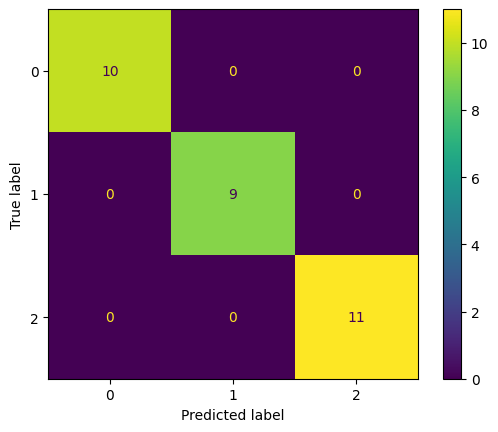

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_knn, X_test, y_test)


/Users/mac/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12609 (\N{HANGUL LETTER MIEUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


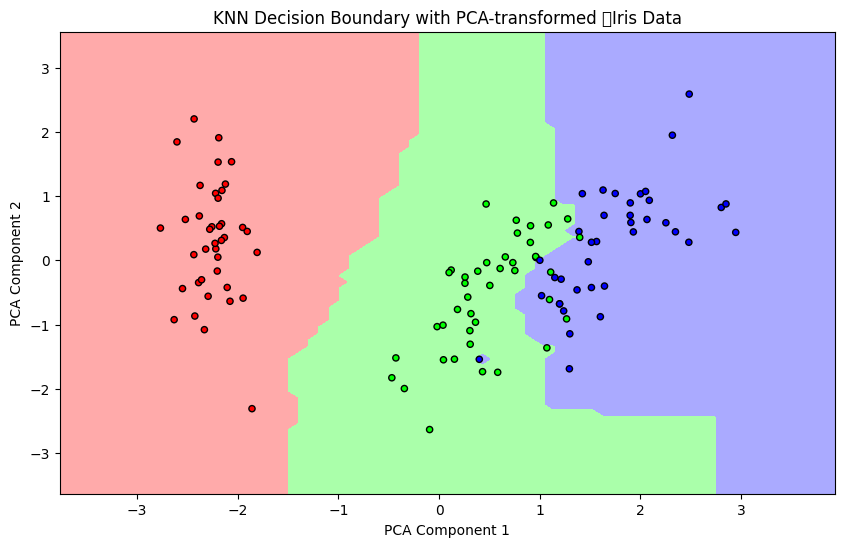

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# PCA를 이용한 2차원으로 차원 축소
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 최적의 KNN 모델로 차원 축소된 데이터에 대해 훈련
best_knn.fit(X_train_pca, y_train)

# 시각화할 영역을 설정 (grid)
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# 그리드의 모든 점에 대해 예측 수행
Z = best_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 컬러맵 설정
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# 결정 경계 시각화
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# 훈련 데이터 산점도
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.title('KNN Decision Boundary with PCA-transformed ㅁIris Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


## 결론
- 데이터의 개수가 매우 적기 때문에 knn 모델링하는데 매우 적합하여 좋은 성능을 보인다.  